In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [25]:
# Load the data
file_path = 'RELIANCE_STOCK (1).csv'
data = pd.read_csv(file_path)

# Display first rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,04-01-2000,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,05-01-2000,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,06-01-2000,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,07-01-2000,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


# Data Preprocessing
&
# Exploratory Data Analysis (EDA)



In [26]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Date          0
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64


In [27]:
# Fill or drop missing values
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [28]:
# Check for duplicate entries
print("\nNumber of duplicate entries:")
print(data.duplicated().sum())
# Drop duplicate
data.drop_duplicates(inplace=True)


Number of duplicate entries:
0


In [29]:
# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [38]:
# Convert data types if necessary
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

ValueError: time data "13-01-2000" doesn't match format "%m-%d-%Y", at position 8. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [39]:
# Summary statistics
print("\nSummary statistics:")
data.describe()


Summary statistics:


,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
count,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5.755000e+03,5706.000000,5556.000000
mean,638.127312,645.944456,629.767855,637.546257,615.249969,1.680536e+07,631.646753,613.786635
std,679.191495,686.648783,671.369321,678.698761,681.607941,1.808567e+07,666.363383,629.546385
min,31.796223,33.962387,30.504259,31.440351,23.964357,0.000000e+00,38.545377,41.448620
25%,103.124977,104.273815,102.065102,102.993458,90.613037,6.342405e+06,108.178830,119.868951
50%,446.368866,450.975220,440.573792,446.145996,418.400177,1.016516e+07,444.586514,453.568654
75%,681.044373,689.563599,667.733062,674.091522,636.486511,2.032690e+07,670.528806,618.653254
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,2.918015e+08,2637.976006,2560.106758


In [40]:
# Display the information about the dataset
print("\nData information:")
print(data.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5755 non-null   object 
 1   Open       5755 non-null   float64
 2   High       5755 non-null   float64
 3   Low        5755 non-null   float64
 4   Close      5755 non-null   float64
 5   Adj Close  5755 non-null   float64
 6   Volume     5755 non-null   float64
 7   MA50       5706 non-null   float64
 8   MA200      5556 non-null   float64
dtypes: float64(8), object(1)
memory usage: 404.8+ KB
None


# Data Visualization

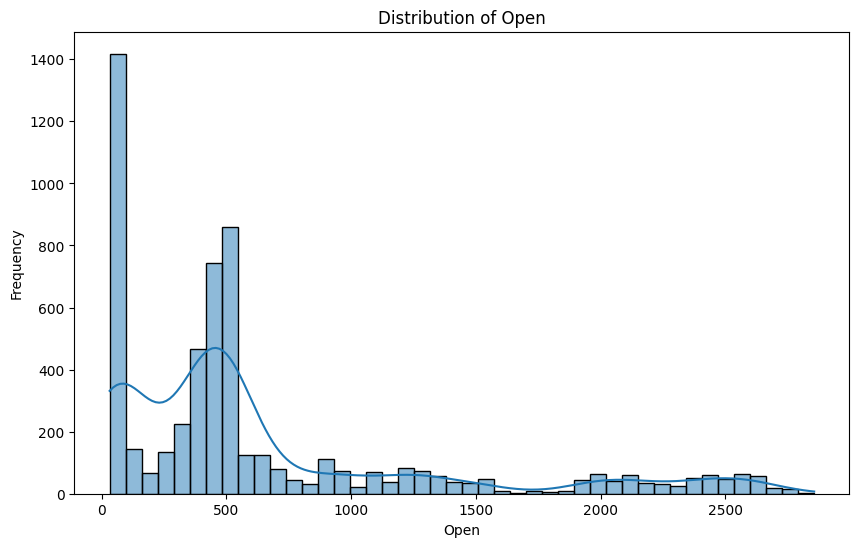

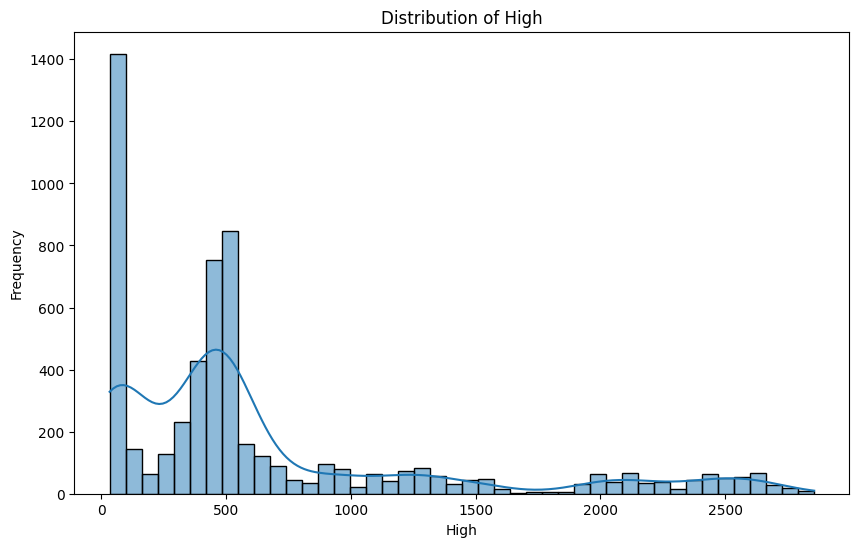

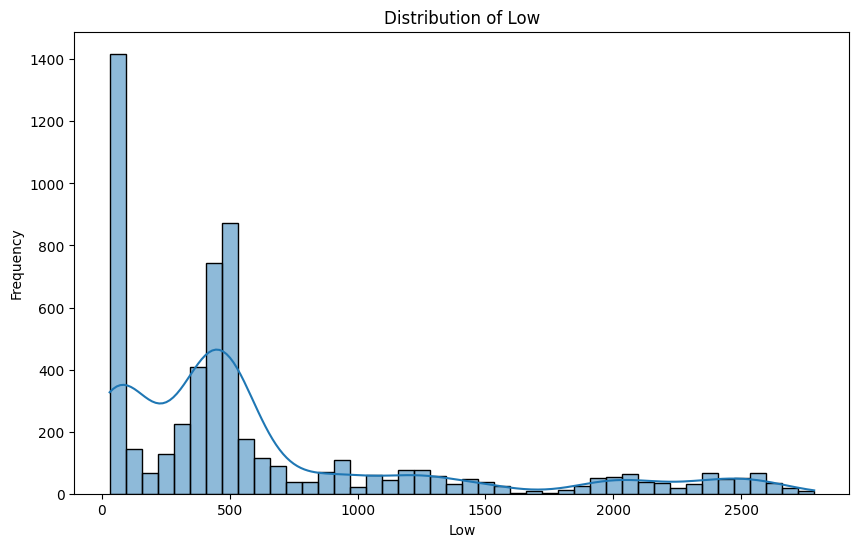

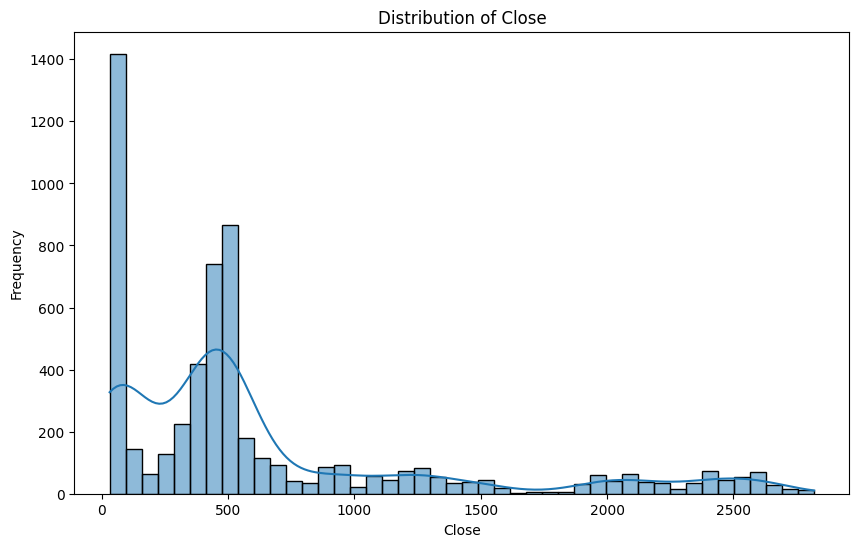

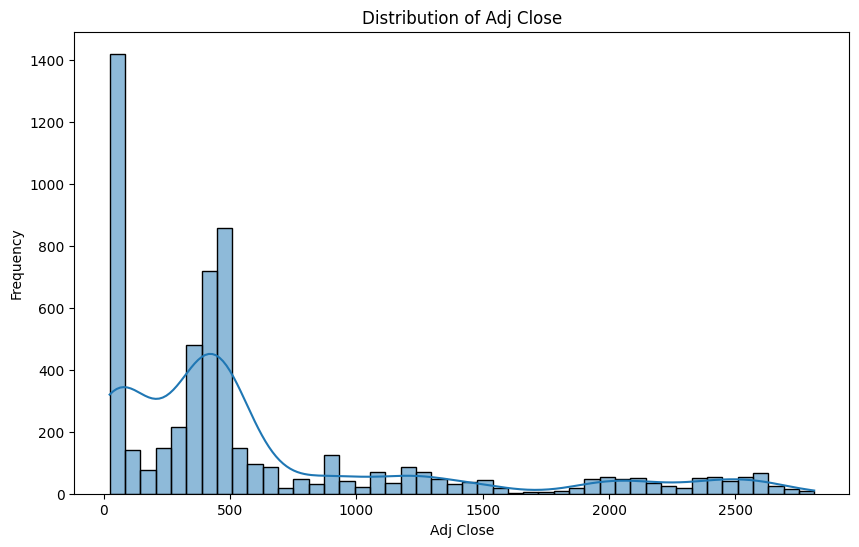

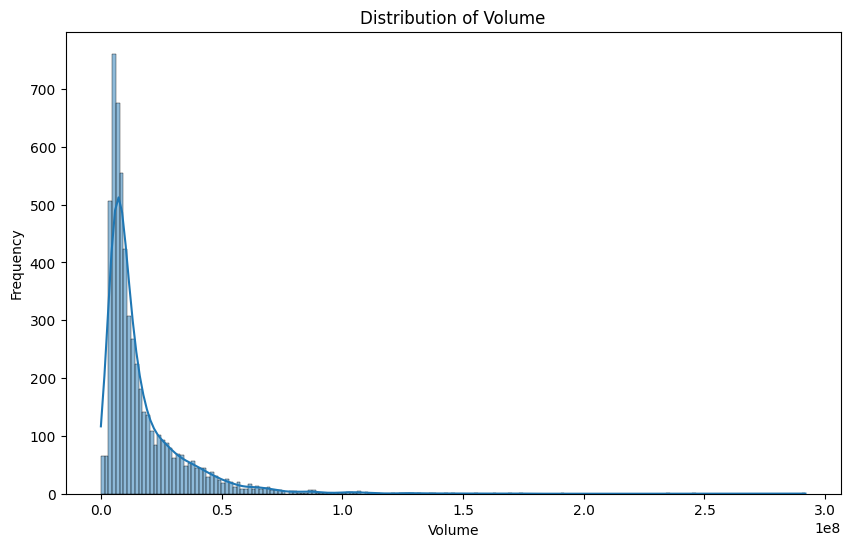

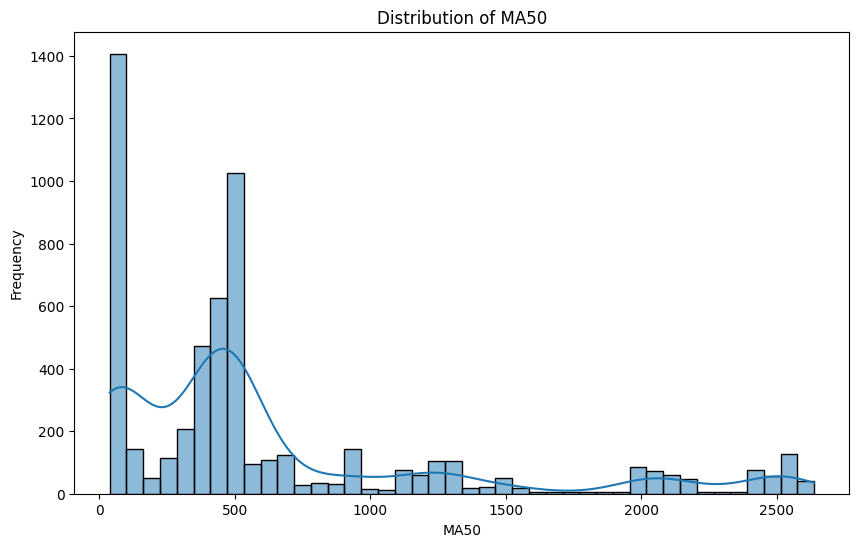

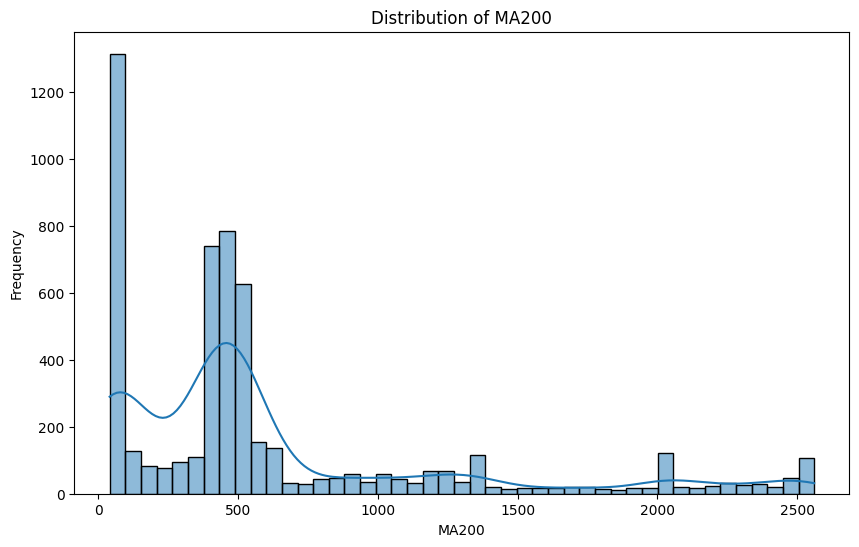

In [41]:
# Plotting the distribution of numerical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

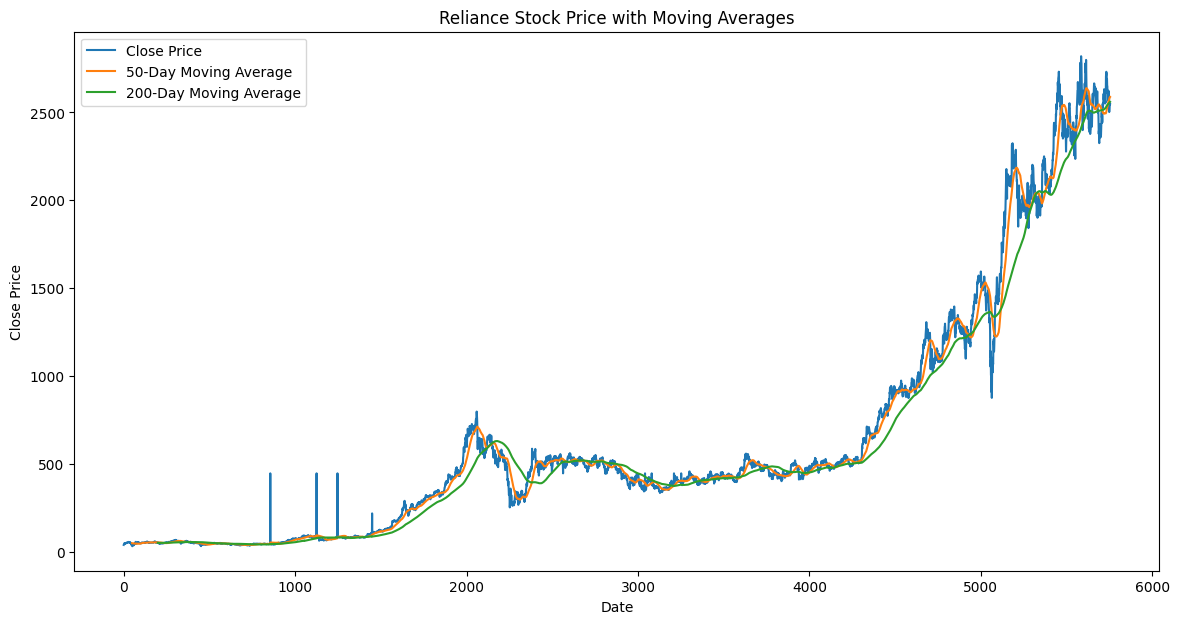

In [42]:
# Moving average
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot with moving averages
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average')
plt.plot(data.index, data['MA200'], label='200-Day Moving Average')
plt.title('Reliance Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
# Plotting the time series if Date column is present
if 'Date' in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data[numeric_columns[0]])
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel(numeric_columns[0])
    plt.show()


In [44]:
# Checking for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '03-01-2000'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Additional EDA based on the dataset's context Scatter plot matrix
sns.pairplot(data)
plt.show()

### Machine learning models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = data.drop(columns=['Close', 'Date'])
target = data['Close']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Linear Regression

In [ ]:
from sklearn.impute import SimpleImputer
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Linear Regression Train RMSE: {train_rmse}")
print(f"Linear Regression Test RMSE: {test_rmse}")
print(f"Linear Regression Train R2: {train_r2}")
print(f"Linear Regression Test R2: {test_r2}")

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("Actual vs Predicted Close Prices (Linear Regression)")
plt.show()

### ARIMA

In [ ]:
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(target) * 0.8)
train_arima, test_arima = target[:train_size], target[train_size:]

arima_model = ARIMA(train_arima, order=(5,1,0))
arima_model_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_model_fit.forecast(steps=len(test_arima))
arima_predictions_train = arima_model_fit.predict(start=0, end=len(train_arima)-1)
arima_predictions_test = arima_predictions

# Evaluation
train_rmse_arima = mean_squared_error(train_arima, arima_predictions_train, squared=False)
test_rmse_arima = mean_squared_error(test_arima, arima_predictions_test, squared=False)
train_r2_arima = r2_score(train_arima, arima_predictions_train)
test_r2_arima = r2_score(test_arima, arima_predictions_test)

print(f"ARIMA Train RMSE: {train_rmse_arima}")
print(f"ARIMA Test RMSE: {test_rmse_arima}")
print(f"ARIMA Train R2: {train_r2_arima}")
print(f"ARIMA Test R2: {test_r2_arima}")

In [ ]:
# visualization
plt.figure(figsize=(14, 7))
plt.plot(test_arima.index, test_arima, label='Actual', color='black')
plt.plot(test_arima.index, arima_predictions_test, label='ARIMA', color='green')
plt.title('ARIMA Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### SVM model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

svm_model = SVR(kernel='rbf')

svm_model.fit(X_train_scaled, y_train)

y_pred_train_svm = svm_model.predict(X_train_scaled)
y_pred_test_svm = svm_model.predict(X_test_scaled)

train_rmse_svm = mean_squared_error(y_train, y_pred_train_svm, squared=False)
test_rmse_svm = mean_squared_error(y_test, y_pred_test_svm, squared=False)
train_r2_svm = r2_score(y_train, y_pred_train_svm)
test_r2_svm = r2_score(y_test, y_pred_test_svm)

print(f"SVM Train RMSE: {train_rmse_svm}")
print(f"SVM Test RMSE: {test_rmse_svm}")
print(f"SVM Train R2: {train_r2_svm}")
print(f"SVM Test R2: {test_r2_svm}")


### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_train = dt_model.predict(X_train_scaled)
y_pred_test = dt_model.predict(X_test_scaled)

# Evaluation of model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Decision Tree Train RMSE: {train_rmse}")
print(f"Decision Tree Test RMSE: {test_rmse}")
print(f"Decision Tree Train R2: {train_r2}")
print(f"Decision Tree Test R2: {test_r2}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Prices')
plt.plot(y_pred_test, label='Predicted Close Prices', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Close Prices")
plt.title("Actual vs Predicted Close Prices (Decision Tree)")
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
# Impute before scaling
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Add clusters
data['cluster'] = kmeans.predict(scaler.transform(features_imputed))

# Visualization of kmean cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Open', y='Close', hue='cluster', data=data, palette='viridis')
plt.title("Clusters of Stock Data")
plt.show()

In [ ]:
#Tuning of best model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")

# Evaluation of best model
best_dt_model = grid_search.best_estimator_
y_pred_test = best_dt_model.predict(X_test_scaled)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Tuned Decision Tree Test RMSE: {test_rmse}")
print(f"Tuned Decision Tree Test R2: {test_r2}")


In [ ]:
#Evaluation of predicticting the best model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    return train_rmse, test_rmse, train_r2, test_r2, y_pred_train, y_pred_test

def evaluate_arima_model(train, test, order):
    arima_model = ARIMA(train, order=order)
    arima_model_fit = arima_model.fit()

    arima_predictions_train = arima_model_fit.predict(start=0, end=len(train)-1)
    arima_predictions_test = arima_model_fit.forecast(steps=len(test))

    train_rmse = mean_squared_error(train, arima_predictions_train, squared=False)
    test_rmse = mean_squared_error(test, arima_predictions_test, squared=False)
    train_r2 = r2_score(train, arima_predictions_train)
    test_r2 = r2_score(test, arima_predictions_test)

    return train_rmse, test_rmse, train_r2, test_r2, arima_predictions_train, arima_predictions_test


In [ ]:
#Evaluation of all models for predicting best model printing
# Linear Regression
lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_results = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Support Vector Machine
svm_model = SVR()
svm_results = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test)

# ARIMA Model
train_size = int(len(target) * 0.8)
train_arima, test_arima = target[:train_size], target[train_size:]
arima_order = (5, 1, 0) 
arima_results = evaluate_arima_model(train_arima, test_arima, arima_order)

# Print results
print(f"Linear Regression Train RMSE: {lr_results[0]}")
print(f"Linear Regression Test RMSE: {lr_results[1]}")
print(f"Linear Regression Train R2: {lr_results[2]}")
print(f"Linear Regression Test R2: {lr_results[3]}")

print(f"Decision Tree Train RMSE: {dt_results[0]}")
print(f"Decision Tree Test RMSE: {dt_results[1]}")
print(f"Decision Tree Train R2: {dt_results[2]}")
print(f"Decision Tree Test R2: {dt_results[3]}")

print(f"SVM Train RMSE: {svm_results[0]}")
print(f"SVM Test RMSE: {svm_results[1]}")
print(f"SVM Train R2: {svm_results[2]}")
print(f"SVM Test R2: {svm_results[3]}")

print(f"ARIMA Train RMSE: {arima_results[0]}")
print(f"ARIMA Test RMSE: {arima_results[1]}")
print(f"ARIMA Train R2: {arima_results[2]}")
print(f"ARIMA Test R2: {arima_results[3]}")


In [ ]:
# Collect all results
results = [
    {'model': 'Linear Regression', 'train_rmse': lr_results[0], 'test_rmse': lr_results[1], 'train_r2': lr_results[2], 'test_r2': lr_results[3]},
    {'model': 'Decision Tree', 'train_rmse': dt_results[0], 'test_rmse': dt_results[1], 'train_r2': dt_results[2], 'test_r2': dt_results[3]},
    {'model': 'SVM', 'train_rmse': svm_results[0], 'test_rmse': svm_results[1], 'train_r2': svm_results[2], 'test_r2': svm_results[3]},
    {'model': 'ARIMA', 'train_rmse': arima_results[0], 'test_rmse': arima_results[1], 'train_r2': arima_results[2], 'test_r2': arima_results[3]}
]
#Comparison
# Find the best model based on Test RMSE
best_model = min(results, key=lambda x: x['test_rmse'])

# Print the results
print(f"Best Model: {best_model['model']}")
print(f"Train RMSE: {best_model['train_rmse']}")
print(f"Test RMSE: {best_model['test_rmse']}")
print(f"Train R2: {best_model['train_r2']}")
print(f"Test R2: {best_model['test_r2']}")


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#model.save('stock prediction.kreas')